In [1]:
import palmerpenguins
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/home/leonardope/mambaforge/envs/estudio/lib/python3.10/site-packages/palmerpenguins/penguins.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
# cargando el dataset de palmerpenguins
df_penguins = palmerpenguins.load_penguins()
df_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
# información general del dataset
df_penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [4]:
# tipos de datos en el dataset
df_penguins.dtypes.value_counts()

float64    4
object     3
int64      1
Name: count, dtype: int64

## Distribucion de los valores nulos por variable

In [5]:
def nulls_by_vars(df):
    num_casos = df.shape[0]
    return df.isnull().pipe(
        lambda df:df.sum()
        .reset_index(name="nulos")
        .rename(columns={"index": "variable"})
        .assign(
            porcentaje_nulos = lambda df: (round(df.nulos / num_casos, 4)*100).map(lambda x: f"{x}%")
        ).sort_values("nulos", ascending=False).reset_index(drop=True)
    )

            variable  nulos porcentaje_nulos
0                sex     11             3.2%
1      bill_depth_mm      2            0.58%
2  flipper_length_mm      2            0.58%
3     bill_length_mm      2            0.58%
4        body_mass_g      2            0.58%
5             island      0             0.0%
6            species      0             0.0%
7               year      0             0.0%


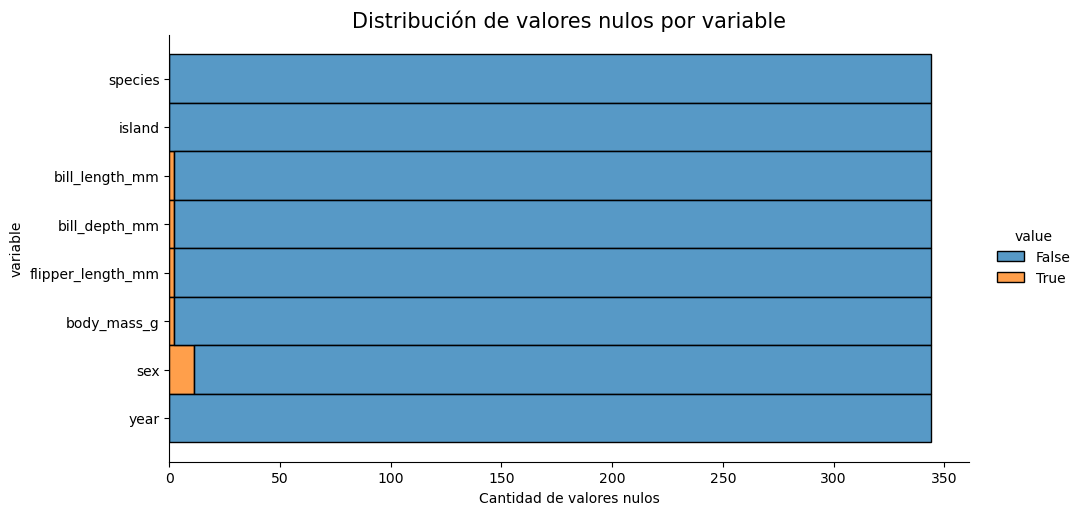

In [6]:
print(nulls_by_vars(df_penguins))

sns.displot(data = df_penguins.isnull().melt(),
            y ="variable", hue="value", aspect=2, multiple="stack")
plt.title("Distribución de valores nulos por variable", size=15)
plt.xlabel("Cantidad de valores nulos")
plt.show()

## Distribucion de los valores nulos por caso

In [7]:
def nulls_by_cases(df):
    num_vars = df.shape[1]
    return df.assign(
        caso = df.index,
        nulos_por_caso = lambda df: df.isnull().sum(axis=1),
        porcentaje_nulos = lambda df: (round(df.nulos_por_caso / num_vars, 4)*100).map(lambda x: f"{x}%")
    ).sort_values("nulos_por_caso", ascending=False).reset_index(drop=True).loc[:, ["species", "caso", "nulos_por_caso", "porcentaje_nulos"]]

  species  caso  nulos_por_caso porcentaje_nulos
0  Gentoo   271               5            62.5%
1  Adelie     3               5            62.5%
2  Gentoo   268               1            12.5%
3  Gentoo   256               1            12.5%
4  Gentoo   218               1            12.5%


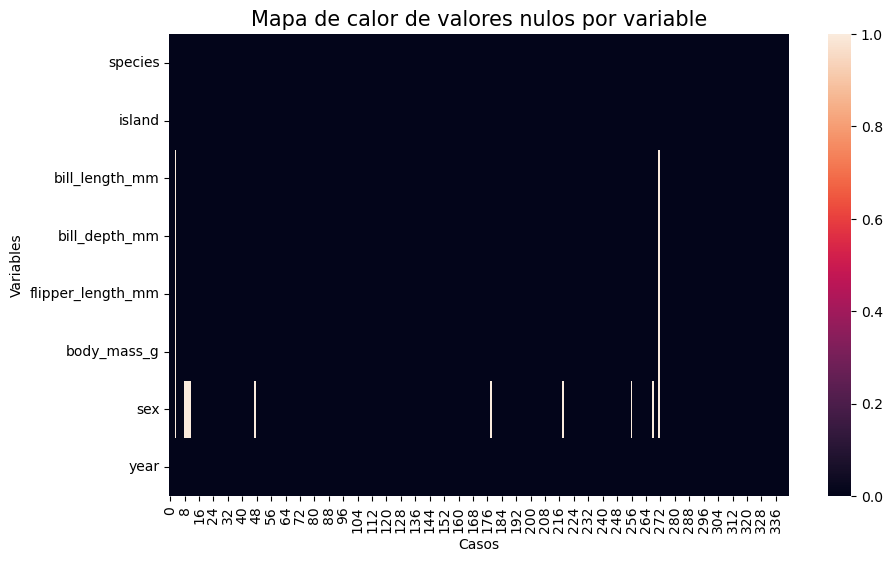

In [8]:
print(nulls_by_cases(df_penguins).head())
plt.figure(figsize=(10, 6))
sns.heatmap(df_penguins.isnull().transpose())
plt.title("Mapa de calor de valores nulos por variable", size=15)
plt.xlabel("Casos")
plt.ylabel("Variables")
plt.show()

## Analizando la eliminación de los valores nulos

In [122]:
# cantidad de valores contando con las que presentan valores nulos
print(f"cantidad de casos contando los valores nulos: {df_penguins.shape[0]}")

# cantidad de valores sin considerar los valores nulos
print(f"cantidad de casos sin contar los valores nulos: {df_penguins.dropna().shape[0]}")

cantidad de casos contando los valores nulos: 344
cantidad de casos sin contar los valores nulos: 333


## Estadísticas descriptivas

In [123]:
# eliminando los valores nulos del dataframe
# estadísticos descriptivos de los valrores numéricos
df_penguins_cleaned = df_penguins.dropna()
print(df_penguins_cleaned.describe(include=np.number).round(3))

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g      year
count         333.000        333.000            333.000      333.000   333.000
mean           43.993         17.165            200.967     4207.057  2008.042
std             5.469          1.969             14.016      805.216     0.813
min            32.100         13.100            172.000     2700.000  2007.000
25%            39.500         15.600            190.000     3550.000  2007.000
50%            44.500         17.300            197.000     4050.000  2008.000
75%            48.600         18.700            213.000     4775.000  2009.000
max            59.600         21.500            231.000     6300.000  2009.000


In [124]:
# estadísticos descriptivos de los valores categóricos
print(df_penguins_cleaned.describe(include="object"))

       species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       146     163   168


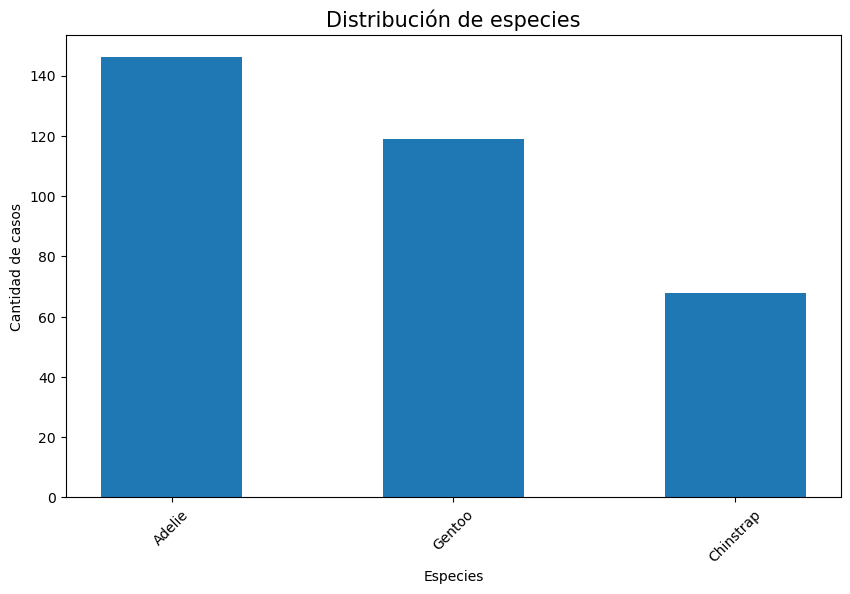

In [125]:
# graficando la distribucioón de las especies
plt.figure(figsize=(10,6))
plt.bar(df_penguins_cleaned["species"].value_counts().index,
        df_penguins_cleaned["species"].value_counts().values, width=0.5)
plt.title("Distribución de especies", size=15)
plt.xlabel("Especies")
plt.ylabel("Cantidad de casos")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_70572/2081142139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_penguins_cleaned.loc[:, "x"] = ""


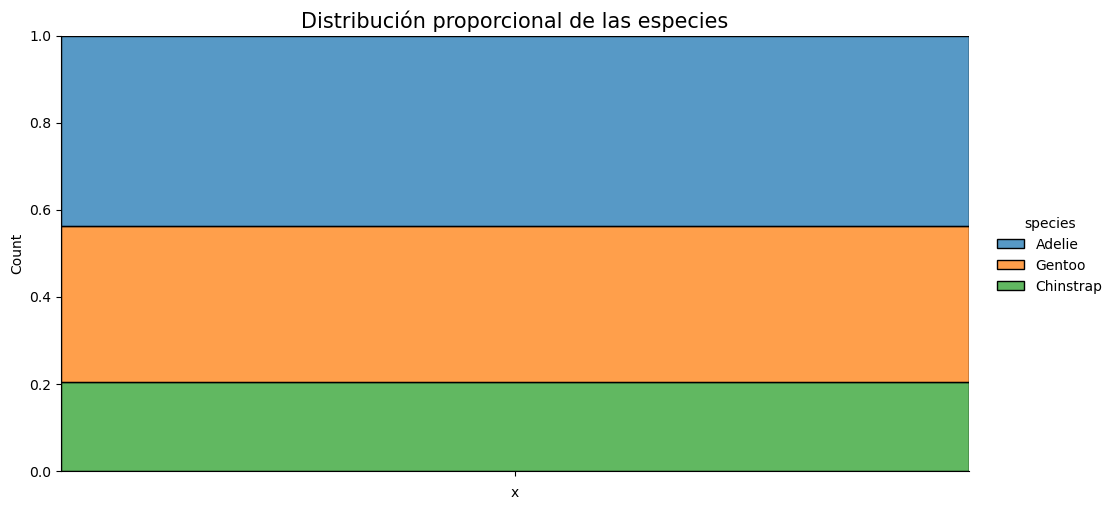

In [126]:
df_penguins_cleaned.loc[:, "x"] = ""
sns.displot(data=df_penguins_cleaned, x="x", hue="species", multiple="fill", aspect=2)
plt.title("Distribución proporcional de las especies", size=15)
plt.show()

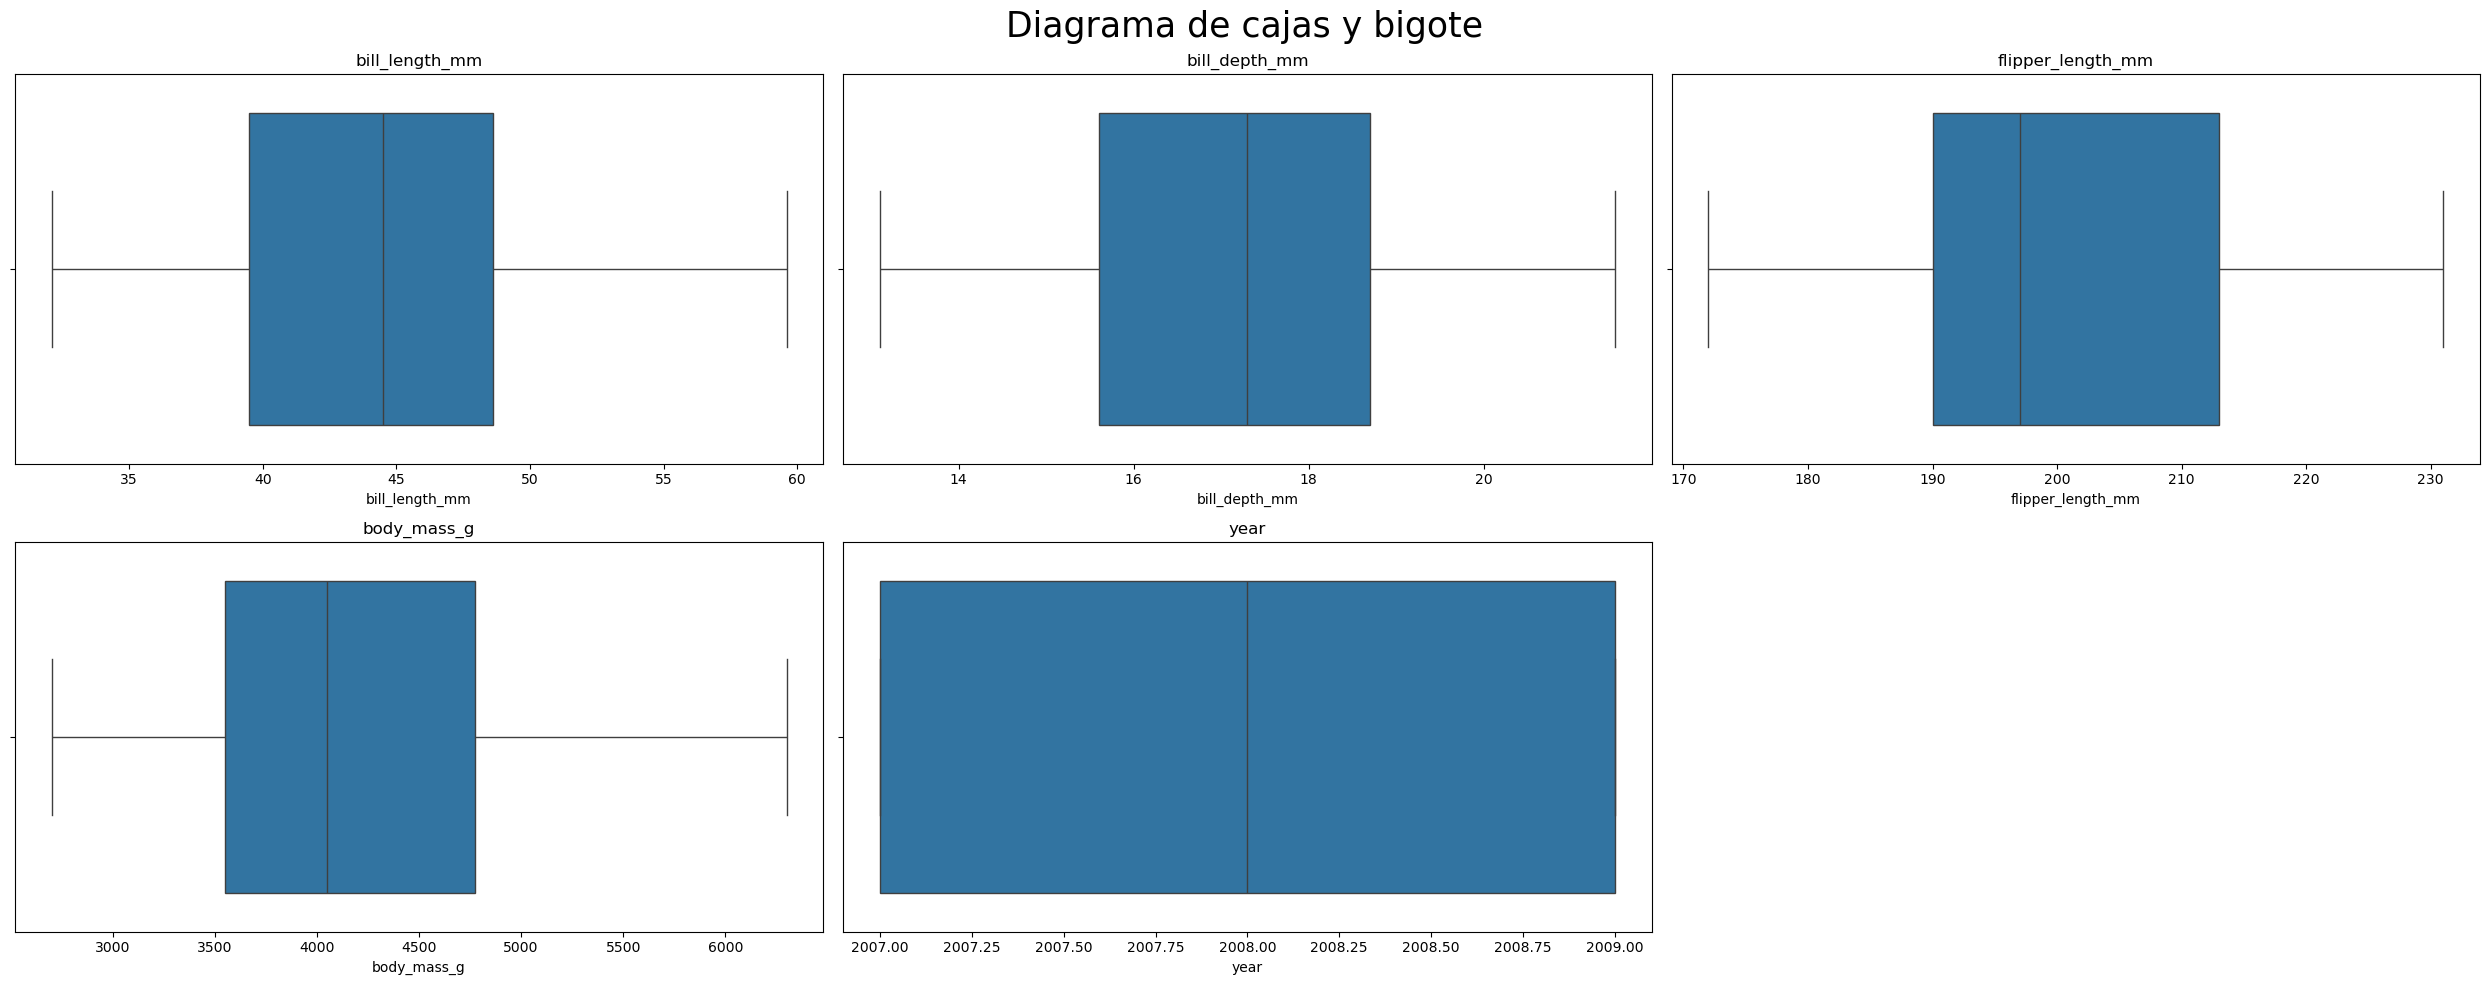

In [127]:
# realizando una gráfica de cajas y bigote
cols_num = df_penguins_cleaned.select_dtypes(include=np.number).columns

fig, ax = plt.subplots(2, 3, figsize=(25, 10))
ax = ax.flat
plt.suptitle("Diagrama de cajas y bigote", size=25)
for i, col in enumerate(cols_num):
    sns.boxplot(data=df_penguins_cleaned, x=col, ax=ax[i])
    ax[i].set_title(col)
for i in range(5, 6):
    fig.delaxes(ax[i])
plt.tight_layout()
plt.show()

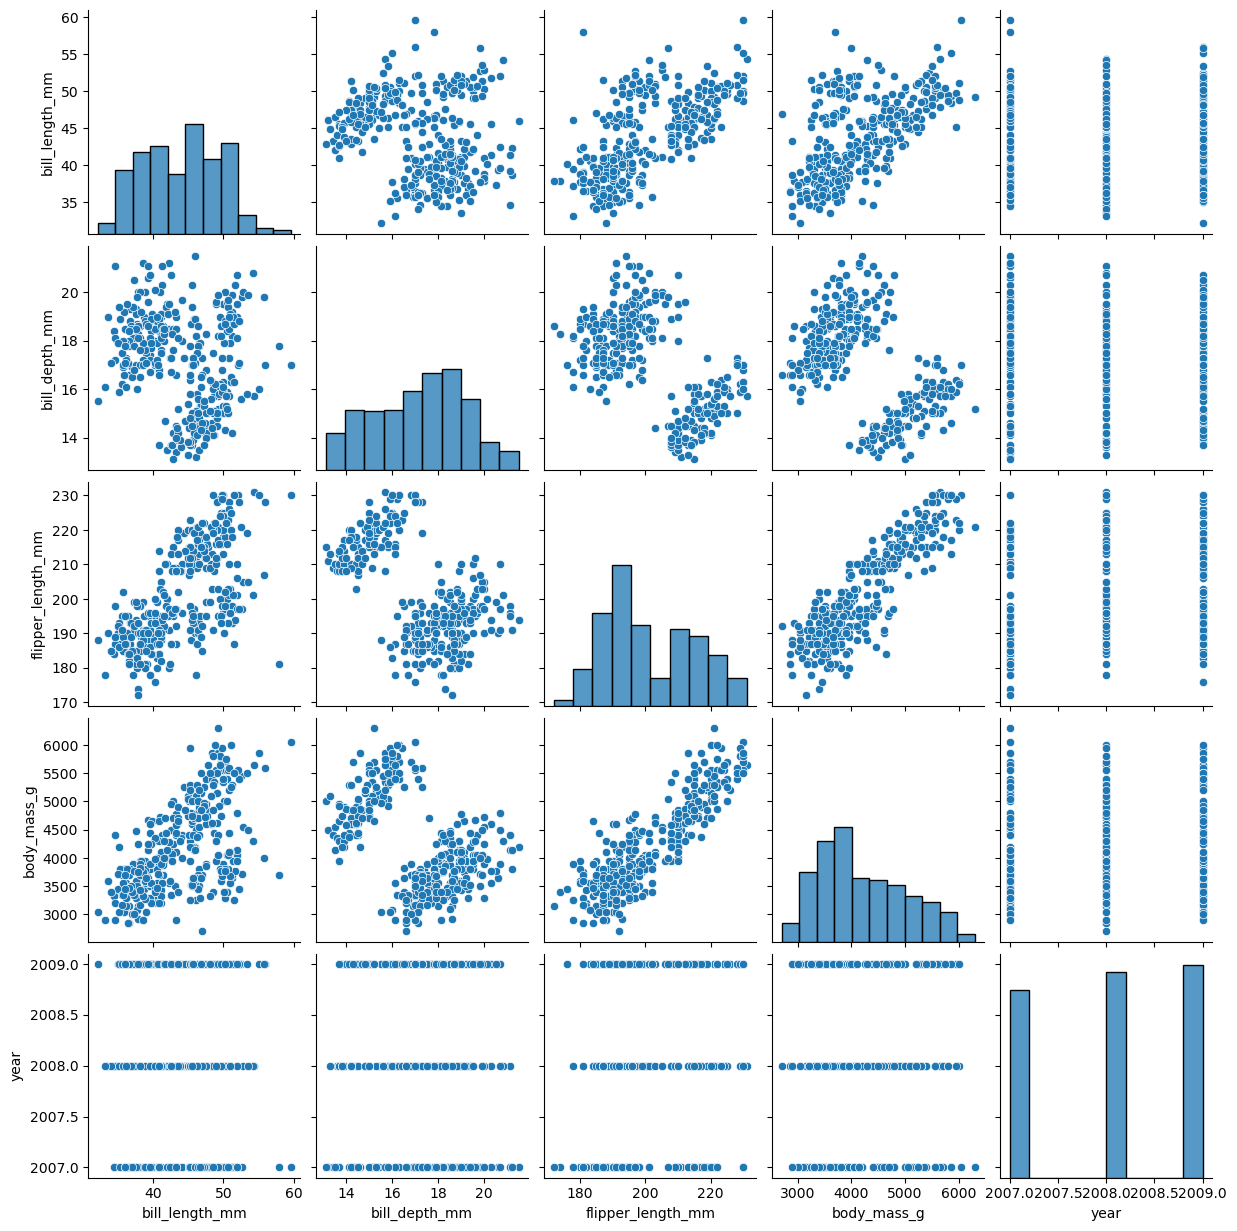

In [128]:
# visualizando las distribuciones de las variables numéricas
sns.pairplot(df_penguins_cleaned.loc[:, cols_num])
plt.show()

In [130]:
df_penguins_cleaned

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,x
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,
...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,


<Axes: xlabel='species', ylabel='bill_length_mm'>

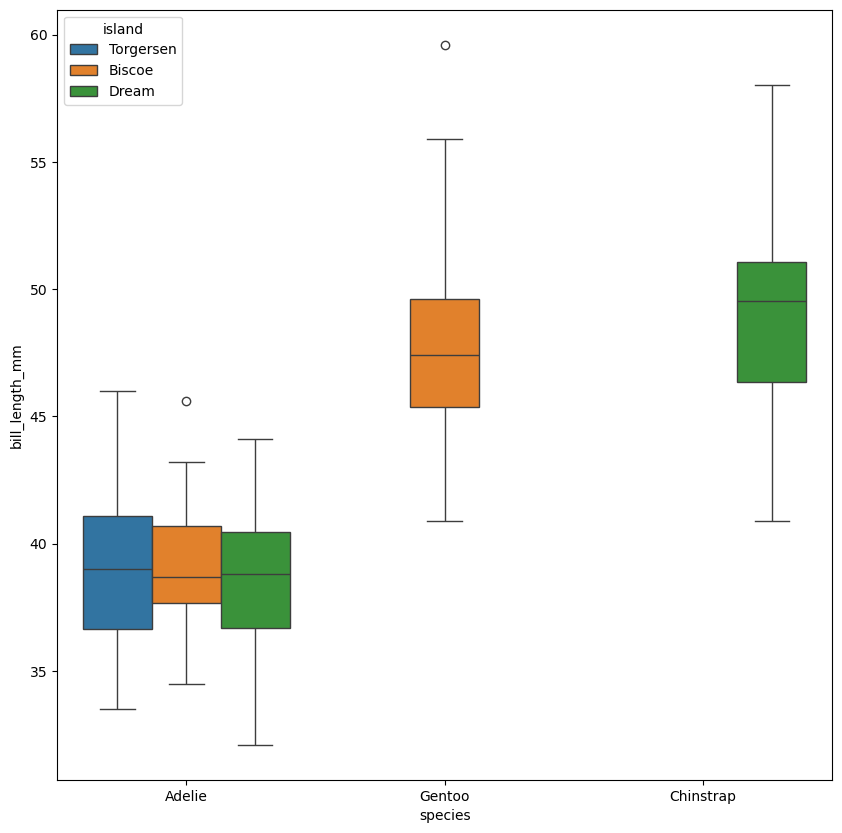

In [132]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df_penguins_cleaned, x="species", y="bill_length_mm", hue="island", dodge=True)

<Axes: xlabel='island', ylabel='bill_length_mm'>

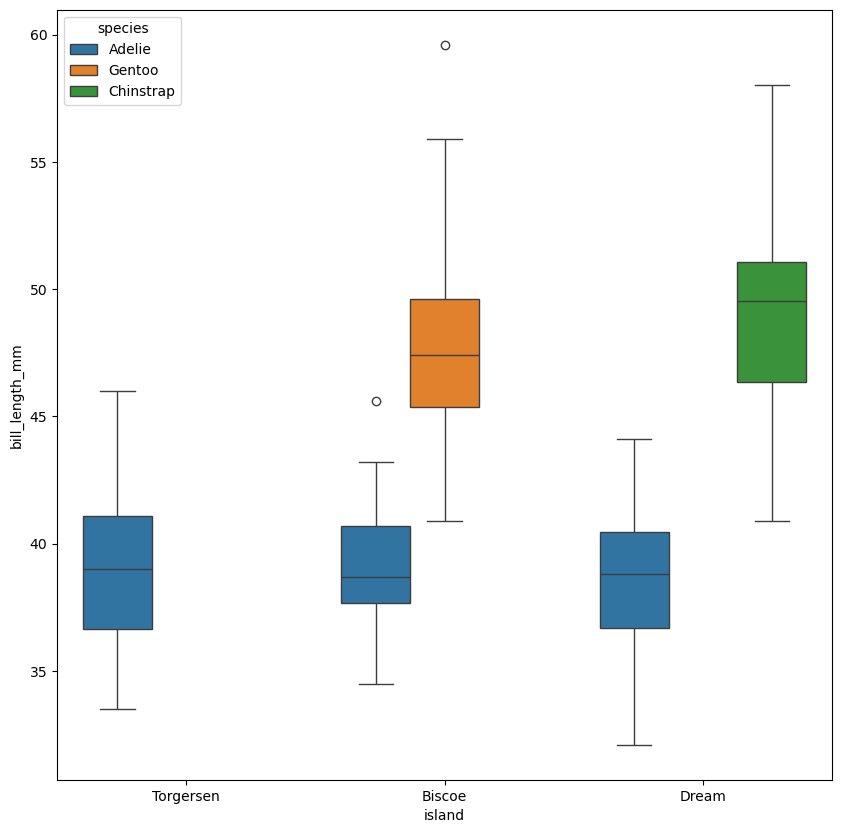

In [133]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df_penguins_cleaned, x="island", y="bill_length_mm", hue="species", dodge=True)